In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
from sklearn.datasets import make_regression #it will give linear data

(500, 1) (500,)


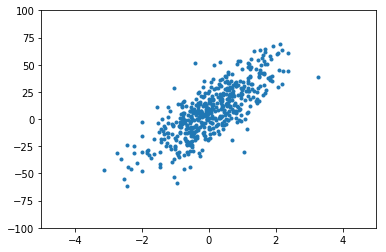

In [58]:
X,y = make_regression(n_samples=500, n_features=1, bias=4.2, noise=15)
print(X.shape, y.shape)

plt.xlim(-5, 5)
plt.ylim(-100,100)

plt.plot(X, y, '.')
plt.show()

In [59]:
split = int(0.8* X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 1) (400,)
(100, 1) (100,)


In [60]:
def hypothesis(x, W):
    x0 = 1
    x1 = x
    h = W[0]+W[1]*x1
    return h

In [61]:
def get_error(X, W, y_true):
    err = 0.0
    m = X.shape[0]
    
    for i in range(m):
        err += (hypothesis(X[i], W)- y_true[i])**2
        
    err = err/(2*m)
    return err

In [62]:
def gradient_descent(X, W, y_true, learning_rate=0.1):
    error = get_error(X,W, y_true)
    m = X.shape[0]
    grad0 = 0.0
    grad1 = 0.0
    for i in range (m):
        grad0 += (y_true[i]-hypothesis(X[i],W))
        grad1 += (y_true[i]-hypothesis(X[i],W))*(X[i])
    grad0 /= m
    grad1 /= m
    W[0] += learning_rate * grad0
    W[1] += learning_rate * grad1
    return error, W

In [63]:
W = np.array([0.1, 0.1])
loss = []

for i in range(10):
    err, W = gradient_descent(X_train, W, y_train, learning_rate=0.1)
    loss.append(err)
    
print(W)

[ 4.89758289 12.24983872]


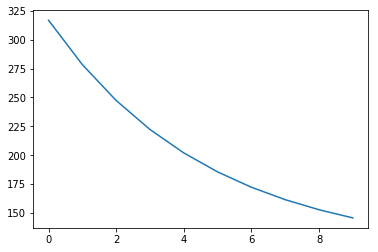

In [64]:
plt.plot(loss)
plt.show()

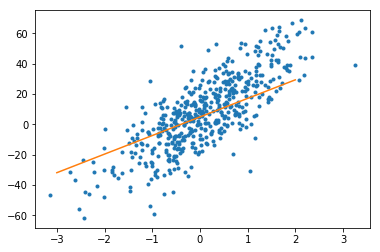

In [65]:
plt.plot(X, y, '.')

x_hyp = np.arange(-3, 3)
y_hyp = W[0]+W[1]*x_hyp
plt.plot(x_hyp, y_hyp)

plt.show()

In [67]:
def stochastic_gradient_descent(X, W, y_true, learning_rate=0.1):
    m = X.shape[0]
    for i in range(m):
        grad0 = (y_true[i]-hypothesis(X[i],W))
        grad1 = (y_true[i]-hypothesis(X[i],W))*(X[i])
        W[0] += learning_rate * grad0
        W[1] += learning_rate * grad1
        err = get_error(X, W, y_true)
        loss.append(err)
    return loss, W

In [69]:
W = np.array([0.1,0.1])
loss, W = stochastic_gradient_descent(X_train, W, y_train)
print(W)

[16.74977297 15.19913956]


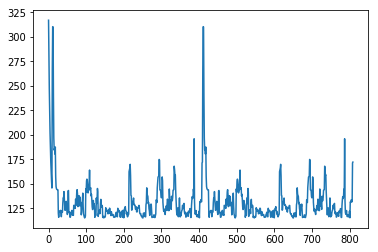

In [70]:
plt.plot(loss)
plt.show()

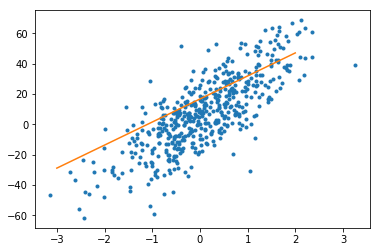

In [71]:
plt.plot(X, y, '.')

x_hyp = np.arange(-3, 3)
y_hyp = W[0]+W[1]*x_hyp
plt.plot(x_hyp, y_hyp)

plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) #It is a R^2 error

0.650836529041806

In [77]:
lr.coef_

array([19.20020074])

In [78]:
lr.intercept_ #0[o]

6.447292237378049